# 시험장 환경 정보

Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|

멀티캠퍼스 강선구 (sunku0316.kang@multicampus.com / sun9sun9@gmail.com)

In [1]:
# 실행 환경 확인

import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels
import mlxtend
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels]:
    print(i.__name__, i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1


In [2]:
# 시각화 모듈 설정
# 참고용 차트를 출력하기 위함
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

# 문제 개요

삼성전자 A공장은 전기료 효율화를 통한 원가절감 방안을 찾고 있다. 

공장 가동 시 일시적인 과부하로 최대수요전력이 증가하면 불리한 기본요금이 산정되고 이는 원가상승 요인이 된다. 

전기 요금은 최대수요전력을 바탕으로 시간 단위로 산정된다. 

최대수요전력을 예측하여 선제적으로 원가상승에 대응하고자 한다.

당일 데이터를 바탕으로, 그 다음 날의 최대수요전력을 예측하는 모델을 개발한다.

보유한 데이터는 A공장에서 2021년 1월 1일 ~ 2021년 9월 14일 (9개월) 동안 변압기에 감지센서를 부착하여

15분 단위로 최대수요전력을 관측한 데이터이다. 

데이터는 2종류이며, ‘elec.csv’ 데이터는 최대수요전력을 측정한 데이터이며, 

'info.csv' 데이터는 측정 당시 기상정보 및 생산량과 인건비율 등의 정보가 포함되어 있다. 


- 데이터 파일: elec.csv (24,642 rows, 4 columns, 데이터셋명-elec)

|변수명|내용|타입|
|------|:--|----|
|Date|측정  날짜|문자열|
|DateHour|측정 날짜와 시간|문자열|
|Minute|15분 간격으로 측정<br/>(15분, 30분, 45분, 60분)|문자열|
|Value|최대수요전력(피크전기 사용량)<br/> 최대수요전력이란 공장 내 설치된 변압기를 통해<br/>일정 시간 단위로 누적 계산되는 전력을 의미|정수형|

- 데이터 파일: info.csv (6,168 rows, 9 columns, 데이터셋명-info)

|변수명|내용|타입|
|----|:--|-----|
|Date|측정 날짜와 시간|문자열|
|생산량|해당 시점에 생산해야 할 생산량|정수형|
|기온|해당 시점의 기온|실수형|
|풍속|해당 시점의 풍속|실수형|
|습도|해당 시점의 습도|정수형|
|강수량|해당 시점의 강수량|실수형|
|전기요금(계절)|해당시점의 전기요금|실수형|
|공장인원|해당 시점에 공장이 보유한 생산력|실수형|
|인건비|야간 및 주간 인건비에 대한 비율값|실수형|

# 전처리(Preprocessing)

데이터를 분석하기 위하여 다음에 안내된 순서대로 데이터를 가공하시오.

## 단계 1 

데이터셋 elec를 이용하여 다음 그림과 같이 재구성하시오.


 ̵ 최대수요전력 (Value)을 시간당 15분 간격으로 관측하여 얻은 4번의 결과 
 
 ̵ DateHour 변수 기준으로 시간당 한 행에 4번 측정결과가 나오도록 재구성함.
 
 ̵ 재구성된 데이터셋은 elec1로 표기(6,168 rows, 5 columns)

|DateHour|15분|30분|45분|60분|
|--------|----|----|----|----|
|2021-01-01 00:00:00|62|61|61|61|
|2021-01-01 01:00:00|96|93|116|113|
|2021-01-01 02:00:00|106|96|106|107|
|2021-01-01 03:00:00|92|110|110|109|
|2021-01-01 04:00:00|108|105|106|108|

In [117]:
# parse_dates를 통해 datetime 형식으로 불러옵니다.
df_elec = pd.read_csv('elec.csv', parse_dates=['Date', 'DateHour'])
df_elec.head()

Date            DateHour Minute  Value
0 2021-01-01 00:15:00 2021-01-01 00:00:00    15분     62
1 2021-01-01 00:30:00 2021-01-01 00:00:00    30분     61
2 2021-01-01 00:45:00 2021-01-01 00:00:00    45분     61
3 2021-01-01 01:00:00 2021-01-01 00:00:00    60분     61
4 2021-01-01 01:15:00 2021-01-01 01:00:00    15분     96

In [118]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 4 columns):
Date        24672 non-null datetime64[ns]
DateHour    24672 non-null datetime64[ns]
Minute      24672 non-null object
Value       24672 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 771.1+ KB


In [119]:
# 방법1: unstack
# unstack은 default로 index의 맨 우측 값을 Column으로 전환시킵니다.
# 인덱스를 DateHour, Minute로 지정하고 불필요한 Date를 삭제한후 
# unstack을 통해 전환시킵니다.
df_elec1 = df_elec.set_index(['DateHour', 'Minute']).drop(columns=['Date']).unstack()
df_elec1.columns = ['15분', '30분', '45분', '60분']
df_elec1.head()

15분  30분  45분  60분
DateHour                               
2021-01-01 00:00:00   62   61   61   61
2021-01-01 01:00:00   96   93  116  113
2021-01-01 02:00:00  106   96  106  107
2021-01-01 03:00:00   92  110  110  109
2021-01-01 04:00:00  108  105  106  108

In [120]:
# 방법2: pivot
# pivot은 index(DateHour), columns(Minute)에 대한 교차값이 하나씩만 존재할 때 성립합니다.
# 만일 없으면, 결측치가 들어 갑니다.
df_elec1 = df_elec.pivot(index='DateHour', columns='Minute', values='Value')
df_elec1.head()

Minute               15분  30분  45분  60분
DateHour                               
2021-01-01 00:00:00   62   61   61   61
2021-01-01 01:00:00   96   93  116  113
2021-01-01 02:00:00  106   96  106  107
2021-01-01 03:00:00   92  110  110  109
2021-01-01 04:00:00  108  105  106  108

In [121]:
# 참고: 
# pivot_table은 index(DateHour), columns(Minute)에 대해 교차값이 여러 개 존재할 경우, 해당 값들에 대한 연산을 정의하여
# DateFrame을 재구성합니다.
df_elec.pivot_table(index='DateHour', columns='Minute', values='Value', aggfunc='mean')

Minute               15분  30분  45분  60분
DateHour                               
2021-01-01 00:00:00   62   61   61   61
2021-01-01 01:00:00   96   93  116  113
2021-01-01 02:00:00  106   96  106  107
2021-01-01 03:00:00   92  110  110  109
2021-01-01 04:00:00  108  105  106  108
...                  ...  ...  ...  ...
2021-09-14 19:00:00  152  151  171  139
2021-09-14 20:00:00  124  130  128  130
2021-09-14 21:00:00  134  130  125  124
2021-09-14 22:00:00  100  109  120  114
2021-09-14 23:00:00  117  119  112   91

[6168 rows x 4 columns]

## 단계 2

데이터셋 elec1의 DateHour 변수를 이용하여 아래의 파생변수를 생성한다.

̵ 요일명(DayName): DateHour 변수에서 요일명을 숫자로 추출, 0(월)~6(일)으로 반환

̵ 시간(Hour): DateHour 변수에서 시간 추출

̵ 오전/오후(AM): 생성한 시간(Hour) 변수를 기준으로 

 12시 전( < 12:00)은 오전(0), 이후(>= 12:00)는 오후(1)로 표기, 이때 표기는 숫자 0, 1로 표기
 
̵ 주말유무(Weekend_yn): 생성한 요일명(DayName) 변수를 이용하여 5,6이면 1(주말), 그외는 0(평일) 로 표기

̵ 공휴일(Holiday_yn): 다음은 공휴일 목록임

  ["2021-01-01", "2021-02-11", "2021-02-12", "2021-03-01", "2021-05-05", "2021-05-19", "2021-08-16"], 

  목록에 해당하면 1, 아니면 0로 표기한다. DateHour의 일자를 기준으로 판별한다.
 
̵ 최대수요전력 평균(Avg): 시간당 15분 간격(15분, 30분, 45분, 60분)으로 측정한 최대수요전력 (Value)의 평균값

̵ 최대수요전력 합계(TotalHour): 시간당 15분 간격(15분, 30분, 45분, 60분)으로 측정한 최대수요전력 (Value)의 총합

In [122]:
holi = pd.to_datetime(["2021-01-01", "2021-02-11", "2021-02-12", "2021-03-01", "2021-05-05", "2021-05-19", "2021-08-16"]).date
min_cols = ['15분', '30분', '45분', '60분']

# df_elec1.index는 Datetimeindex입니다. p.Series.dt Accessor와 거의 동일하게 사용할 수 있습니다.
# assign은 변수를 만들면서, deep copy를 할 수 있는 명령입니다. 매개변수명이 변수고 매개변수가 값이 형태로 생깁니다.

df_elec1 = df_elec1.assign(
    DayName = df_elec1.index.weekday, # 요일을 뽑아옵니다
    Hour = df_elec1.index.hour, # 시간을 뽑아옵니다.
    AM = (df_elec1.index.hour >= 12).astype(int),
    Weekend_yn = df_elec1.index.weekday.isin([5, 6]).astype(int), # isin을 통해 리스트 안의 값에 해당하는지 봅니다.
    Holiday_yn = np.isin(df_elec1.index.date, holi).astype(int), # 일자만을 뽑아 비교합니다.
    Avg = df_elec1[min_cols].mean(axis=1), # 평균 
    TotalHour = df_elec1[min_cols].sum(axis=1) # 합계
)
df_elec1.head()

Minute               15분  30분  45분  60분  DayName  Hour  AM  Weekend_yn  \
DateHour                                                                 
2021-01-01 00:00:00   62   61   61   61        4     0   0           0   
2021-01-01 01:00:00   96   93  116  113        4     1   0           0   
2021-01-01 02:00:00  106   96  106  107        4     2   0           0   
2021-01-01 03:00:00   92  110  110  109        4     3   0           0   
2021-01-01 04:00:00  108  105  106  108        4     4   0           0   

Minute               Holiday_yn     Avg  TotalHour  
DateHour                                            
2021-01-01 00:00:00           1   61.25        245  
2021-01-01 01:00:00           1  104.50        418  
2021-01-01 02:00:00           1  103.75        415  
2021-01-01 03:00:00           1  105.25        421  
2021-01-01 04:00:00           1  106.75        427

## 단계 3
    
info데이터셋에 결측치가 존재한다. 이 때 발생된 결측치들은 0으로 변경하시오. 

- 풍속, 강수량은 바람이 불지 않는 경우, 비가 오지 않는 경우 기록되지 않는 경우가 존재함, 이는 0의 의미임

- 공장인원의 경우 생산량이 없다던가 인력이 필요하지 않은 경우 기록되지 않는 경우가 존재함, 이는 0의 의미임

- 결측치를 처리한 후 데이터셋명은 info1로 표기함


In [123]:
df_info = pd.read_csv('info.csv')
df_info.head()

Date  생산량   기온   풍속  습도  강수량  전기요금(계절)  공장인원  인건비
0  2021-01-01 00:00:00    0 -3.2  2.4  71  0.0     109.8   0.0  1.5
1  2021-01-01 01:00:00    0 -4.5  1.5  77  0.0     109.8   0.0  1.5
2  2021-01-01 02:00:00    0 -3.9  2.6  58  0.0     109.8   0.0  1.5
3  2021-01-01 03:00:00    0 -4.1  2.6  56  0.0     109.8   0.0  1.5
4  2021-01-01 04:00:00    0 -4.6  2.6  60  0.0     109.8   0.0  1.5

In [124]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 9 columns):
Date        6168 non-null object
생산량         6168 non-null int64
기온          6168 non-null float64
풍속          6165 non-null float64
습도          6168 non-null int64
강수량         6167 non-null float64
전기요금(계절)    6168 non-null float64
공장인원        6151 non-null float64
인건비         6168 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 433.8+ KB


In [125]:
# pd.to_datetime으로 문자열을 datetime 형식으로 바꿔 봅니다.
df_info['Date'] = pd.to_datetime(df_info['Date'])
df_info1 = df_info.fillna(0) # 결측을 모두 0으로 대치하고 info1에 넣습니다.
df_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 9 columns):
Date        6168 non-null datetime64[ns]
생산량         6168 non-null int64
기온          6168 non-null float64
풍속          6168 non-null float64
습도          6168 non-null int64
강수량         6168 non-null float64
전기요금(계절)    6168 non-null float64
공장인원        6168 non-null float64
인건비         6168 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 433.8 KB


## 단계 4

elec1와 info1 데이터프레임을 결합하시오. 

결합 시 elec1데이터셋 에서는 DateHour 변수, info1데이터셋 에서는 Date 변수를 기준으로 inner join하시오.


- elec1 데이터셋에 info1을 데이터셋 결합
 
- 결합 방식: inner join, elec1.DateHour == info1.Date
 
- 결합 후 Date와 DateHour 같다. 두 변수를 이름을 DateHour 하여 하나만 남긴다.
 
- 결합 후 생성된 데이터셋명 basetable1로 표기(6,168 rows, 20 columns)


In [126]:
# 방법1: merge
# merge는 caller(호출자, left_on), callee(피호출자, right_on)을 컬럼(인덱스에 명칭이 부여됐을 경우, 인덱스 사용가)을
# 기준으로 결합니다.
df_basetable1 = df_elec1.merge(df_info1, left_on='DateHour', right_on='Date', how='inner')\
        .rename(columns={'Date': 'DateHour'}).set_index('DateHour')
df_basetable1.shape

(6168, 19)

In [127]:
df_basetable1.head()

15분  30분  45분  60분  DayName  Hour  AM  Weekend_yn  \
DateHour                                                                 
2021-01-01 00:00:00   62   61   61   61        4     0   0           0   
2021-01-01 01:00:00   96   93  116  113        4     1   0           0   
2021-01-01 02:00:00  106   96  106  107        4     2   0           0   
2021-01-01 03:00:00   92  110  110  109        4     3   0           0   
2021-01-01 04:00:00  108  105  106  108        4     4   0           0   

                     Holiday_yn     Avg  TotalHour  생산량   기온   풍속  습도  강수량  \
DateHour                                                                     
2021-01-01 00:00:00           1   61.25        245    0 -3.2  2.4  71  0.0   
2021-01-01 01:00:00           1  104.50        418    0 -4.5  1.5  77  0.0   
2021-01-01 02:00:00           1  103.75        415    0 -3.9  2.6  58  0.0   
2021-01-01 03:00:00           1  105.25        421    0 -4.1  2.6  56  0.0   
2021-01-01 04:00:00           1  106.75        427    0 -4.6  2.6  60  0.0   

                     전기요금(계절)  공장인원  인건비  
DateHour                                  
2021-01-01 00:00:00     109.8   0.0  1.5  
2021-01-01 01:00:00     109.8   0.0  1.5  
2021-01-01 02:00:00     109.8   0.0  1.5  
2021-01-01 03:00:00     109.8   0.0  1.5  
2021-01-01 04:00:00     109.8   0.0  1.5

In [128]:
# 방법2: join
# join은 caller(호출자, on)의 컬럼, callee(피호출자)의 인덱스 기준으로 결합니다.
# 따라서 df_info1의 'Date'를 set_index를 통해 인덱스 영역에 위치 시킵니다.
df_basetable1 = df_elec1.join(df_info1.set_index('Date'), on='DateHour', how='inner')
df_basetable1.shape

(6168, 19)

# 문제 1

basetable1을 이용하여 다음 질문에 답하시오.

In [129]:
df_basetable1.head()

15분  30분  45분  60분  DayName  Hour  AM  Weekend_yn  \
DateHour                                                                 
2021-01-01 00:00:00   62   61   61   61        4     0   0           0   
2021-01-01 01:00:00   96   93  116  113        4     1   0           0   
2021-01-01 02:00:00  106   96  106  107        4     2   0           0   
2021-01-01 03:00:00   92  110  110  109        4     3   0           0   
2021-01-01 04:00:00  108  105  106  108        4     4   0           0   

                     Holiday_yn     Avg  TotalHour  생산량   기온   풍속  습도  강수량  \
DateHour                                                                     
2021-01-01 00:00:00           1   61.25        245    0 -3.2  2.4  71  0.0   
2021-01-01 01:00:00           1  104.50        418    0 -4.5  1.5  77  0.0   
2021-01-01 02:00:00           1  103.75        415    0 -3.9  2.6  58  0.0   
2021-01-01 03:00:00           1  105.25        421    0 -4.1  2.6  56  0.0   
2021-01-01 04:00:00           1  106.75        427    0 -4.6  2.6  60  0.0   

                     전기요금(계절)  공장인원  인건비  
DateHour                                  
2021-01-01 00:00:00     109.8   0.0  1.5  
2021-01-01 01:00:00     109.8   0.0  1.5  
2021-01-01 02:00:00     109.8   0.0  1.5  
2021-01-01 03:00:00     109.8   0.0  1.5  
2021-01-01 04:00:00     109.8   0.0  1.5

## 단계 1-1

시간당 최대수요전력 합계(TotalHour)의 최대값과 최소값이 차이를 구하고, 이 값을 A라고 한다.

In [130]:
mx, mn = df_basetable1['TotalHour'].agg(['max', 'min'])
A = mx - mn
A

830

## 단계 1-2 

일별로 시간당 최대수요전력 합계(TotalHour)의 최대값을 찾아 최대값이 빈번하게 발생하는 시간을 찾고자 한다.

일별로 최대수요전력 합계(TotalHour)의 최대값이 첫 번째로 빈번하게 발생하는 시간(Hour)을 B, 

두 번째로 빈번하게 발생하는 시간(Hour)을 C라고 한다. 

하루에 최대값에 해당하는 시간(Hour)이 여러 번 나올 수 있음을 고려하라.

In [131]:
# groupby ~ transform을 통해 각각의 행이 일별 최대 TotalHour에 해당하는지 판별하는 boolean index를 만들어,
# 일별 최대 TotalHour에 해당하는 행들을 선택하고, 'Hour'의 빈도를 취해 값을 도출합니다.
B, C = df_basetable1.loc[
    df_basetable1.groupby(df_basetable1.index.date)['TotalHour'].transform(lambda x: x == x.max()),
    'Hour'
].value_counts().iloc[:2].index
B, C

(8, 11)

## 단계 1-3

일별 기준(DateHour 변수 사용)으로 시간당 최대수요전력 합계(TotalHour) 의 범위(최대값-최소값)가 가장 큰 값을 찾고 

이 값을 D라고 한다.

In [132]:
D = df_basetable1.groupby(df_basetable1.index.date)['TotalHour'].agg(lambda x: x.max() - x.min()).max()
D

706

## 단계 1-4

공휴일과 주말을 제외한 평일 데이터만 추출을 한 후, 

일별 기준으로 시간당 최대수요전력 합계(TotalHour)의 범위(최대값-최소값)가 가장 큰 일자의 요일명(DayName)을 E라고 한다.



In [133]:
# loc을 통해 공휴일과 주말을 제외한 평일 데이터만 추출하고
# pipe를 통해 필터링한 데이터프레임을 임시 데이터프레임을 만들지 않고 
# 그대로 받아 추가적인 연산을 진행합니다.
E = df_basetable1.loc[(df_basetable1[['Weekend_yn', 'Holiday_yn']] == 0).all(axis=1)]\
            .pipe(lambda x: x.groupby(x.index.date)['TotalHour'].agg(lambda x: x.max() - x.min()))\
            .idxmax().weekday()
E

0

In [134]:
# 참고 코드: 위에서 all 말고 다른 방법을 봅니다.
(df_basetable1['Weekend_yn'] == 0) & (df_basetable1['Holiday_yn'] == 0)

DateHour
2021-01-01 00:00:00    False
2021-01-01 01:00:00    False
2021-01-01 02:00:00    False
2021-01-01 03:00:00    False
2021-01-01 04:00:00    False
                       ...  
2021-09-14 19:00:00     True
2021-09-14 20:00:00     True
2021-09-14 21:00:00     True
2021-09-14 22:00:00     True
2021-09-14 23:00:00     True
Length: 6168, dtype: bool

In [138]:
# 참고 코드: pipe 없이 해봅니다.
df_tmp = df_basetable1.loc[(df_basetable1[['Weekend_yn', 'Holiday_yn']] == 0).all(axis=1)]
df_tmp.groupby(df_tmp.index.date)['TotalHour'].agg(lambda x: x.max() - x.min()).idxmax().weekday()

0

In [107]:
A, B, C, D, E, A + B + C + D + E

(830, 8, 11, 706, 0, 1555)

A + B + C + D + E를 적으시오.

**1555**

# 문제 2

최대수요전력 평균(Avg) 값이 오전/오후에 따라 차이가 있는지 검정하시오.

##  단계 2-1

basetable1 에서 공휴일과 주말을 제외하고 prob2 데이터프레임을 만든다. 

- prob2에서 시간(Hour)이 8과 11사이 (8, 11 포함) 또는 13과 16 (13, 16 포함) 사이의 행들만 남긴다.

- prob2에서 Avg가 130이상인 행들만을 남긴다.

Hint] 최종 1233개 행만 남는다.


In [143]:
df_prob2 = df_basetable1.loc[
    (df_basetable1['Weekend_yn'] == 0) & (df_basetable1['Holiday_yn'] == 0)
].copy()
df_prob2.head()

15분  30분  45분  60분  DayName  Hour  AM  Weekend_yn  \
DateHour                                                                 
2021-01-04 00:00:00   72   67   66   66        0     0   0           0   
2021-01-04 01:00:00   96  108  119  109        0     1   0           0   
2021-01-04 02:00:00  106  106  111  116        0     2   0           0   
2021-01-04 03:00:00  104  105  104  113        0     3   0           0   
2021-01-04 04:00:00  115  109  108  103        0     4   0           0   

                     Holiday_yn     Avg  TotalHour  생산량   기온   풍속  습도  강수량  \
DateHour                                                                     
2021-01-04 00:00:00           0   67.75        271    0 -0.1  1.7  39  0.0   
2021-01-04 01:00:00           0  108.00        432    0 -0.9  1.3  44  0.0   
2021-01-04 02:00:00           0  109.75        439    0 -0.4  1.4  42  0.0   
2021-01-04 03:00:00           0  106.50        426    0 -2.1  1.5  50  0.0   
2021-01-04 04:00:00           0  108.75        435    0 -1.9  1.8  50  0.0   

                     전기요금(계절)  공장인원  인건비  
DateHour                                  
2021-01-04 00:00:00     109.8   0.0  1.5  
2021-01-04 01:00:00     109.8   0.0  1.5  
2021-01-04 02:00:00     109.8   0.0  1.5  
2021-01-04 03:00:00     109.8   0.0  1.5  
2021-01-04 04:00:00     109.8   0.0  1.5

In [142]:
# 방법1: query
df_prob2 = df_prob2.query('((Hour >= 8 and Hour <= 11) or (Hour >= 13 and Hour <= 16)) and Avg >= 130')
df_prob2.shape

(1233, 19)

In [148]:
# 방법2: boolean index, between
df_prob2 = df_prob2.loc[
    (df_prob2['Hour'].between(8, 11, inclusive=True) | df_prob2['Hour'].between(13, 16, inclusive=True)) &\
    (df_prob2['Avg'] >= 130)
]
df_prob2.shape

(1233, 19)

In [153]:
# 방법3: boolean index, pipe 버젼
df_prob2 = df_prob2.loc[
    df_prob2['Hour'].pipe(lambda x: ((x >= 8) & (x <= 11)) | ((x >= 13) & (x <= 16))) &\
    (df_prob2['Avg'] >= 130)
]
df_prob2.shape

(1233, 19)

In [178]:
df_prob2['Avg'].agg(['mean', 'std'])

mean    167.335969
std      12.806019
Name: Avg, dtype: float64

## 단계 2-2

오전(AM = 0) 인 행들을 대상으로 Avg에 대하여 Shapiro-Wilk 검정을 사용하여 정규성 검정한다. 

검정 결과에서 p-value를 A라고 한다.

---
**함수가이드**

scipy.stats 제공 기능 활용

문제 지시사항 외 Default 값 사용

---

In [160]:
from scipy.stats import shapiro
result_2_2 = shapiro(df_prob2.loc[df_prob2['AM'] == 0, 'Avg'])
A = result_2_2.pvalue
result_2_2, A

(ShapiroResult(statistic=0.9945228695869446, pvalue=0.026428762823343277),
 0.026428762823343277)

## 단계 2-3

오후(AM = 1) 인 행들을 대상으로 Avg에 대하여 Shapiro-Wilk 검정을 사용하여 정규성 검정한다. 

검정 결과에서 p-value를 B라고 한다.

In [161]:
from scipy.stats import shapiro
result_2_3 = shapiro(df_prob2.loc[df_prob2['AM'] == 1, 'Avg'])
B = result_2_3.pvalue
result_2_3, B

(ShapiroResult(statistic=0.9950335025787354, pvalue=0.043661389499902725),
 0.043661389499902725)

## 단계 2-4

오전/오후에 따라 Avg의 모평균에 차이가 있는지 검정을 한다.

검정 방법은 T-검정을 사용하며, Bartlett 검정을 하고 결과를 T-검정 시 반영한다(유의 수준 5%). 

검정 결과에서 검정통계량의 절대값을 C라고 한다.

---
**함수가이드**

scipy.stats 제공 기능 활용

문제 지시사항 외 Default 값 사용

---


In [165]:
from scipy.stats import bartlett
equal_var = bartlett(
    df_prob2.loc[df_prob2['AM'] == 0, 'Avg'],
    df_prob2.loc[df_prob2['AM'] == 1, 'Avg']
).pvalue >= 0.05
equal_var

True

In [170]:
from scipy.stats import ttest_ind
result_2_4 = ttest_ind(
    df_prob2.loc[df_prob2['AM'] == 0, 'Avg'],
    df_prob2.loc[df_prob2['AM'] == 1, 'Avg'],
    equal_var = equal_var
)
C = abs(result_2_4.statistic)
result_2_4, C

(Ttest_indResult(statistic=8.27772409322812, pvalue=3.2348808563995005e-16),
 8.27772409322812)

In [181]:
from scipy.stats import t
(1 - t.cdf(8.27772409322812, (df_prob2['AM'] == 0).sum() + (df_prob2['AM'] == 1).sum() - 2)) * 2
#T = 8.27772409322812

4.440892098500626e-16

## 단계 2-5

단계 2-2와 2-3의 검정 결과를 바탕으로, 단계 2-4의 T-검정의 가정을 만족한다면 D 값을 1 아니면 0으로 한다. (유의 수준을 5%)

In [171]:
D = 0
D

0

## 단계 2-6

오전/오후에 따라 Avg를 구분하여 Mann-Whitney U 검정을 하라. 검정 결과 pvalue을 E값으로 한다. 대립 가설은 '오전의 Avg와 오후의 Avg의 중앙값은 같지 않다' 입니다.

---
**함수가이드**

scipy.stats.mannwhitneyu, alternative를 문제 요건에 반드시 맞추어 설정합니다.

문제 지시사항 외 Default 값 사용

---


In [175]:
from scipy.stats import mannwhitneyu
result_2_6 = mannwhitneyu(
    df_prob2.loc[df_prob2['AM'] == 0, 'Avg'],
    df_prob2.loc[df_prob2['AM'] == 1, 'Avg'],
    alternative='two-sided'
)
E = result_2_6.pvalue
result_2_6, E

(MannwhitneyuResult(statistic=239777.5, pvalue=1.7651446950415425e-15),
 1.7651446950415425e-15)

In [176]:
A, B, C, D, E, A + B + C + D + E

(0.026428762823343277,
 0.043661389499902725,
 8.27772409322812,
 0,
 1.7651446950415425e-15,
 8.347814245551367)

A + B + C + D + E를 소수점 넷째 자리에서 반올림하여 셋째 자리까지 적으시오

**8.348**

## 단계 2-7, Optional

Avg에 대하여 AM, DayName 두 범주에 대하여 이원산 분산분석(Two-way ANOVA)을 수행하고 상호작용항의 검정통계량을 구하라.

---
**함수가이드**

statsmodels.formula.api.ols

statsmodels.api.stats

문제 지시사항 외 Default 값 사용

---

## 쉬는 시간: ~ 12: 00

## 문제 3


DateHour를 기준으로 다음날 같은 시각의 최대전력사용량을 예측하려고 한다.


## 단계 3-1 

basetable1에 아래 그림과 같이, DateHour를 기준으로 다음날 같은 시각의 TotalHour를 이용하여 파생 변수 target을 생성한다. 

target에 결측치가 있는 행은 모두 제거하여 prob3 데이터셋을 만든다.

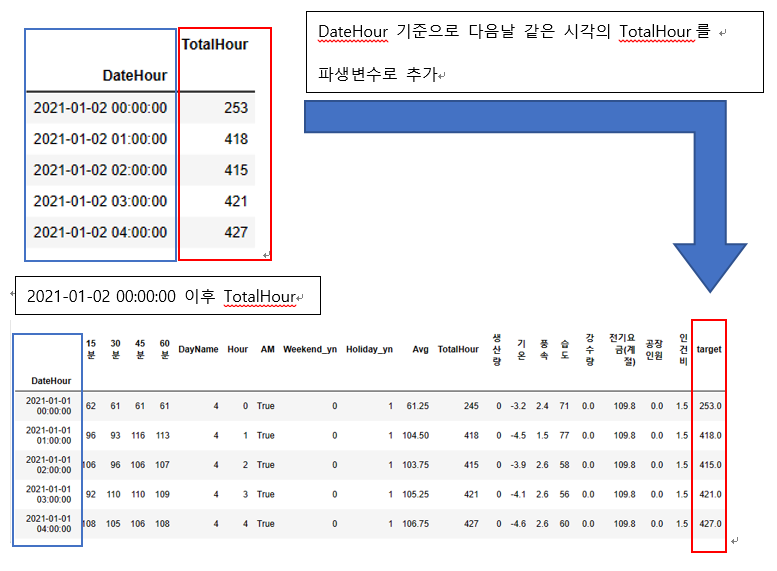

## 단계 3-2 

prob3을 학습용과 테스트용 데이터셋을 2021년 8월 14일 전과 이후로 분리

. prob3_train: DateHour 변수 기준으로 2021년 8월 14일 전(8월 14일 미포함) 데이터 (행의 수: 5400개)

. prob3_test: DateHour 변수 기준으로 2021년 8월 14일 이후(8월 14일 포함) 데이터 (행의 수: 744 개)


## 단계 3-3

결정트리 회귀모델(Decision Tree Regression Model)을 사용하여 target을 예측하는 모델을 prob3_train으로 학습시킨다. 

요건은 다음과 같다.


성능 측정 지표: $MAE(Y, \hat{Y})=\frac{1}{n}\sum^n_{i=1}|y_i - \hat{y_i}|$

입력 변수: 15분, 30분, 45분, 60분, DayName, Hour, AM, Weekend_yn, Holiday_yn, Avg, TotalHour, 

           생산량, 기온, 풍속, 습도, 강수량, 전기요금(계절), 공장인원, 인건비
※ 입력 변수의 순서는 반드시 나열한 순서로 해야 함.

대상 변수: target

결정 트리 구성 요건:

   
   |하이퍼 파라미터|값|
   |-|-|
   |트리의 최대 깊이|10|
   |리프 노드(Leaf Node)의 최소 샘플 수|4|
   |랜덤 시드|123|
 
---
**함수가이드**

sklearn.tree 제공 기능 활용

문제 지시 사항 외 Default 값 사용

---
 
모델의 학습 결과 가장 중요도가 높은 변수의 입력 순서를 A (순서는 1부터 시작) 라고 한다. 

결정 트리의 prob3_test에 대한 성능을 B라고 한다. 


## 단계 3-4

결정트리 대신에 경사 부스팅(Gradient Boosting) 회귀모델을 사용한다. 

경사 부스팅(Gradient Boosting) 회귀모델구성 요건:

   
   |하이퍼 파라미터|값|
   |-|-|
   |손실함수|huber|
   |트리의 수|75|
   |트리의 최대 깊이|7|
   |리프 노드(Leaf Node)의 최소 샘플 수|4|
   |랜덤 시드|123|

prob3_train으로 학습하고 prob3_test에 대한 성능을 C라고 한다.

----
**함수가이드**

sklearn.ensemble 제공 기능 활용

문제 지시 사항 외 Default 값 사용

---

A + B + C를 소수점 넷째 자리에서 반올림하여 셋째 자리까지 적으시오

Ex) 3.142

## 문제 4

DateHour를 기준으로 동일한 시각의 n일 이전의 TotalHour를 파생 변수 lag_n이라고 한다. 

예를 들어 DateHour가 2021-01-07 00:00:00이라면, lag_1은 2021-01-06 00:00:00의 TotalHour값인 96이 된다. 

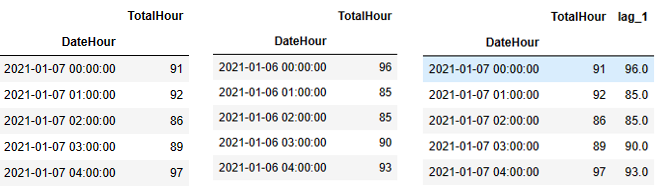

## 단계 4-1

prob3에 lag_1 ~ lag_6까지의 6개의 파생 변수를 추가하여 prob4를 만든다. 

prob4에 lag_1 ~ lag_6까지 하나라도 결측치가 있다면 삭제한다.

## 단계 4-2

학습용과 테스트용 데이터셋을 2021년 8월 14일 전과 이후로 분리

. prob4_train: DateHour 변수 기준으로 2021년 8월 14일 전(8월 14일 미포함) 데이터 (행의 수: 5256개)

. prob4_test: DateHour 변수 기준으로 2021년 8월 14일 이후(8월 14일 포함) 데이터 (행의 수: 744 개)

## 단계 4-3

prob4_train에서 TotalHour와 lag_1~6 를 표준화하고, 

prob4_train의 표준화 설정으로 prob4_test의 TotalHour와 lag_1~6를 표준화한다.


---
**함수가이드**

sklearn.preprocessing  제공 기능 활용

문제 지시 사항 외 Default 값 사용

---

## 단계 4-4

SVR 모델을 아래 요건에 3가지 커널(Kernel)로 prob4_train을 학습하고 

prob4_test로 성능을 측정한다. 

그 중 가장 좋은 성능을 보인 커널의 번호를 A(No.), 그 때의 성능을 B라고 한다.

성능 측정 지표: $MAE(Y, \hat{Y})=\frac{1}{n}\sum^n_{i=1}|y_i - \hat{y_i}|$

입력 변수: TotalHour, lag_1 ~ 6

대상 변수: target

커널함수:

1: $k(x_i,x_j)=\langle x_i,x_j \rangle$

2: $k(x_i,x_j)=(\gamma \langle x_i,x_j \rangle +1)^2,\gamma=0.1$

3: $k(x_i,x_j)=exp⁡(||-\gamma ||x_i-x_j||^2 ),\gamma=0.1$

 $\langle x,x' \rangle:x,x'$ 의 내적,$||x_i-x_j||^2$:L2-norm

----
**함수가이드**

sklearn.svm.SVR, C=10

문제 지시 사항 외 Default 값 사용

---


A + B 를 소수점 셋째 자리에서 반올림하여 둘째 자리까지 적으시오

Ex) 3.14

## 단계 4-5, Optional

퍼셉트론 회귀모델을 다음과 같이 3가지 설정으로 prob4_train으로 학습하고, 

prob4_test로 성능을 측정한다. 

가장 좋은 성능을 보인 경우의 번호(No.) C, 그 때의 성능을 D라고 한다.


성능 측정 지표: $MAE(Y, \hat{Y})=\frac{1}{n}\sum^n_{i=1}|y_i - \hat{y_i}|$ 

입력 변수: TotalHour, lag_1 ~ 6

대상 변수: target

신경망 설정:

|No.|은닉층의 수|은닉층의 활성화 함수|
|---|---------|-------------|
|1|[8]|relu|
|2|[8, 4]|relu|
|3|[8, 4]|sigmoid|


---
**함수가이드**

sklearn.neural_network.MLPRegressor, 

learning_rate_init=0.05, random_state=123, max_iter=500

---

# 문제 5

info에서 기온, 풍속, 습도 강수량 데이터에서 이상치를 탐색하고자 한다.

## 단계 5-1

info1에서 기온, 풍속, 습도, 강수량 만을 떼어 weather1 데이터프레임을 만든다.

## 단계 5-2

weather1의 기온, 풍속, 습도, 강수량을 표준화 한다.


## 단계 5-3

DBSCAN 군집화를 입실론(epsilon) 반경을 0.5, 주변 영역에 포함하는 최소 샘플수를 7로하여 군집화를 수행 한다. 

weather1에 DBSCAN 결과에서 소속 군집이 없는 샘플들을 이상점으로 간주한다. 

이상점 여부를 파생변수 outlier_dbscan로 하여 weather1에 추가한다. (소속 군집이 있으면: False, 없으면 True)

  입력변수: 기온, 풍속, 습도, 강수량

---
**함수가이드**

sklearn.cluster.DBSCAN, algorithm=’brute’

문제 지시 사항 외 Default 값 사용

---


## 단계 5-4

IsolationForest를 사용하여 weather1의 이상점을 탐색한다. 

학습시 bootstrapping은 하지 않고, 트리의 수는 30개를 사용한다. 

IsolationForest으로 탐지한 이상점 여부는 파생변수 outlier_isof로 하여 weather1에 추가한다. (이상치라면 True, 아니면 False)

입력변수: 기온, 풍속, 습도, 강수량

---
**함수가이드**

sklearn.ensemble.IsolationForest, random_state=123, contamination=’auto’, behaviour=’auto’

문제 지시 사항 외 Default 값 사용

---



## 단계 5-5

LocalOutlierFactor를 사용하여 weather1의 이상점을 탐색한다. 

관찰할 주변의 샘플은 10개이다. 그리고, 샘플간의 거리는 유클리디언 거리를 사용한다. 

LocalOutlierFactor로 탐지한 이상 여부를 outlier_lof로 하여 weather1에 추가한다.

입력변수: 기온, 풍속, 습도, 강수량

---
**함수가이드**

sklearn.neighbors.LocalOutlierFactor, contamination=’auto’

---

## 단계 5-6 

outlier_dbscan가 True인 행의 개수를 A, outlier_isof가 True인 행의 개수 B
,  outlier_lof가 True인 행의 개수 C 이다.


## 단계 5-7

outlier_dbscan, outlier_isof 그리고 outlier_lof 모두가 True인 행의 개수는 D이다.

A + B + C + D를 적는다.

# 문제 6

(kaggle 형 문제) prob4 를 바탕으로 아래 데이터셋을 만든다.

. prob6_train: DateHour 변수 기준으로 2021년 8월 14일 전(8월 14일 미포함) 데이터 (행의 수: 5256개)

. prob6_test: DateHour 변수 기준으로 2021년 8월 14일 이후(8월 14일 포함) 데이터 (행의 수: 744 개)

일 때, prob6_train으로 target을 예측하는 모델을 만들어, 

prob6_test의 target에 대한 MAE를 최소화하는 모델을 만든다. 

prob6_test의 예측 결과를 아래와 같은 형식으로 출력한다. 파일명은 answer6.csv 이다.

|DateHour|TotalHour|
|--------|---------|
|2021-08-14 00:00:00|102.607580|
|2021-08-14 01:00:00|94.078890|
....